# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [34]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Write your code here
df.shape

(1898, 9)

#### Observations: In this data set there are 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [37]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There are no null values in all 9 columns, which means there is no missing data. Order ID, customer ID, cost, food preparation time and delivery time are of type integer. The restaurant name, type of cuisine, day of the week, and ratings are objects(text/string). Rating should be type integer but there are some ratings given as 'Not given'.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [38]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: There are no missing values in the data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [39]:
# Write your code here
df['food_preparation_time'].describe()

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


#### Observations: The minimum time it takes to prepare food is 20 minutes, whilst the average time is 27.37 minutes and the maximum time 35 minutes once the order is placed.


### **Question 5:** How many orders are not rated? [1 mark]

In [40]:
# Write the code here
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations: There are 736 orders that are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

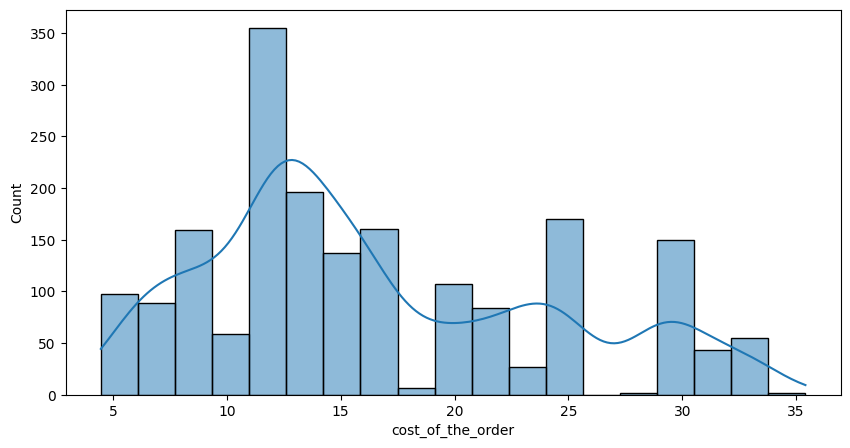

In [10]:
# Write the code here
plt.figure(figsize = (10,5))
sns.histplot(data =df, x = 'cost_of_the_order', kde = True)

###

#### Observations: The histogram is right-skewed (positively skewed), which means most orders have lower costs, while a smaller number of orders are high-priced. The most frequent order cost range appears to be  between $10-$15.

<Axes: xlabel='cost_of_the_order'>

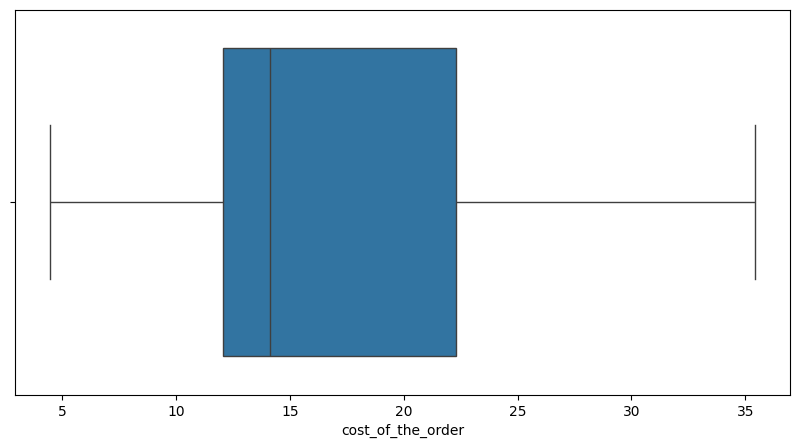

In [11]:
plt.figure(figsize = (10,5))
sns.boxplot(data =df, x = 'cost_of_the_order')

#### Observations: The graph shows that most orders cost between $12 and $22, with a median value around $14. There are no outliers.

<Axes: xlabel='food_preparation_time', ylabel='Count'>

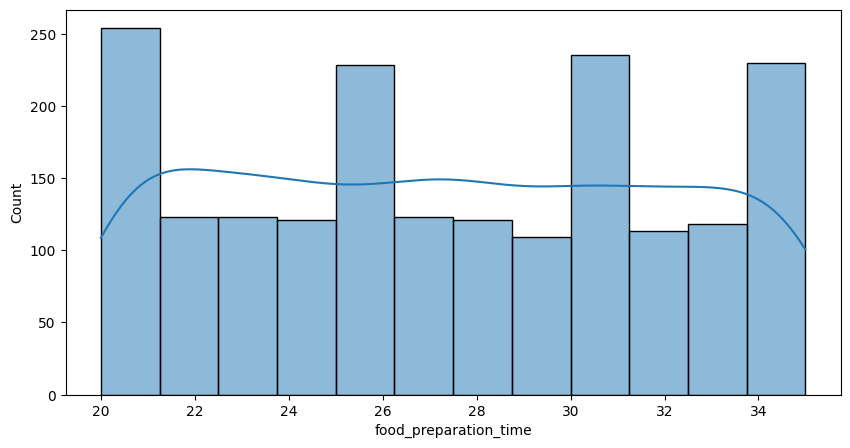

In [12]:
plt.figure(figsize = (10,5))
sns.histplot(data =df, x = 'food_preparation_time', kde = True)

#### Observations: The graph displays a roughly uniform distribution between 20 and 35 minutes.

<Axes: xlabel='food_preparation_time'>

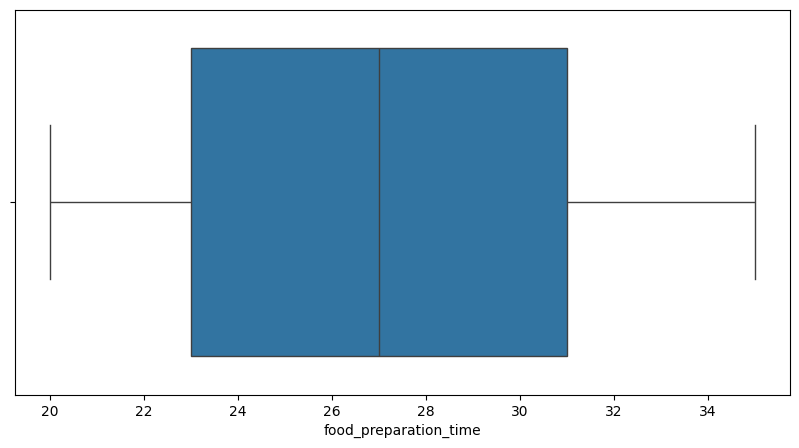

In [13]:
plt.figure(figsize = (10,5))
sns.boxplot(data =df, x = 'food_preparation_time')

#### Observations: The graph shows a consistent and symmetric distribution, with most orders taking between 23 and 31 minutes to prepare and a median of about 27 minutes. There are no outliers present.

<Axes: xlabel='delivery_time', ylabel='Count'>

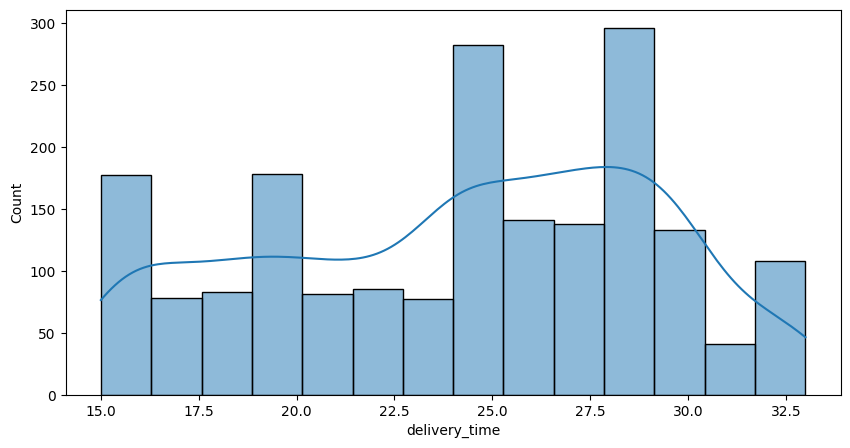

In [14]:
plt.figure(figsize = (10,5))
sns.histplot(data =df, x = 'delivery_time', kde = True)

#### Observations: The graph shows a mostly uniform but slightly right-skewed distribution, with most deliveries completed within 20–30 minutes.

<Axes: xlabel='delivery_time'>

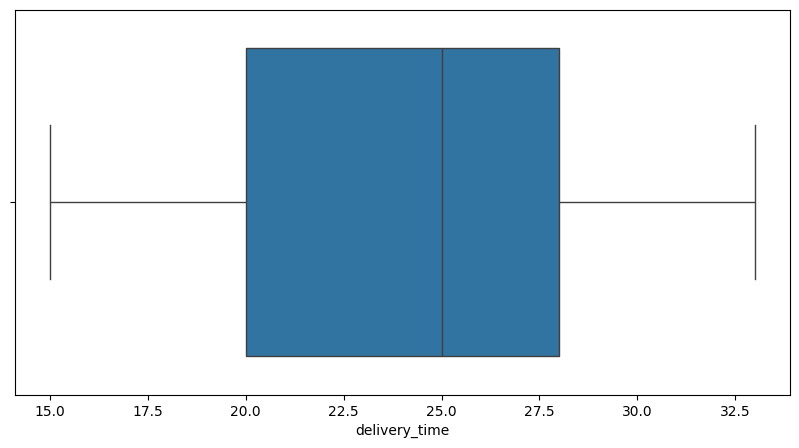

In [15]:
plt.figure(figsize = (10,5))
sns.boxplot(data =df, x = 'delivery_time')

#### Observations: The graph shows a mostly uniform but slightly right-skewed distribution, with most deliveries completed within 20–30 minutes. There are no outliers.

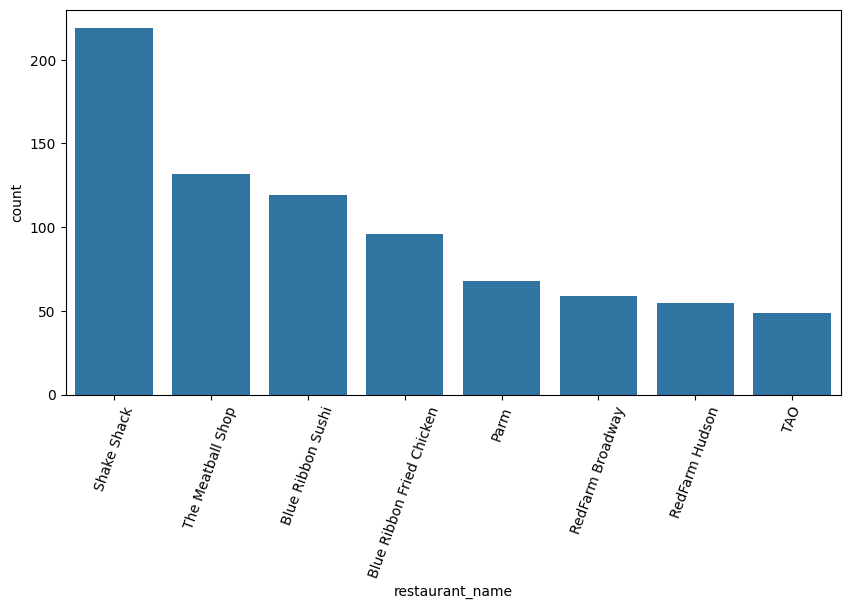

In [16]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'restaurant_name', order = df['restaurant_name'].value_counts().head(8).index);
plt.xticks(rotation = 70);

#### Observations: The graoh shows that Shake Shack is the most frequently ordered-from restaurant, receiving over 200 orders. The Meatball Shop and Blue Ribbon Sushi rank second and third.

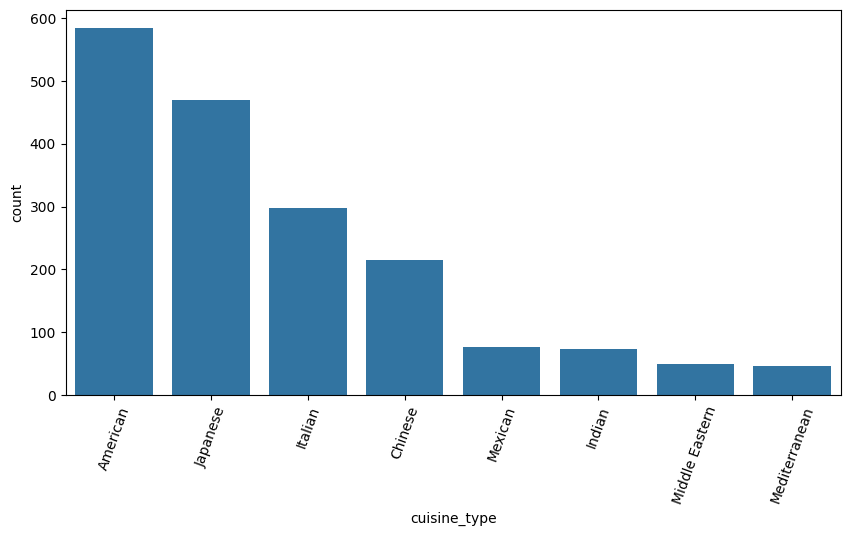

In [17]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'cuisine_type', order = df['cuisine_type'].value_counts().head(8).index);
plt.xticks(rotation = 70);

#### Observations: The graph shows that American cuisine is the highest ordered cuisine, with over 500 orders, followed by Japanese cuisine with over 400 orders. Mediterranean and Middle Eaastern are the least ordered cuisines.

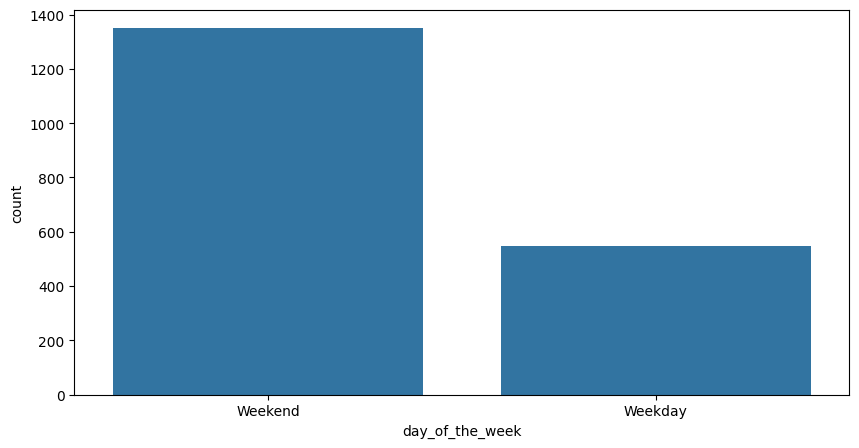

In [18]:
plt.figure(figsize = (10,5))
sns.countplot(data =df, x = 'day_of_the_week');

#### Observations: A higher number of orders are placed during the weekend (Saturdays and Sundays) than on weekdays.

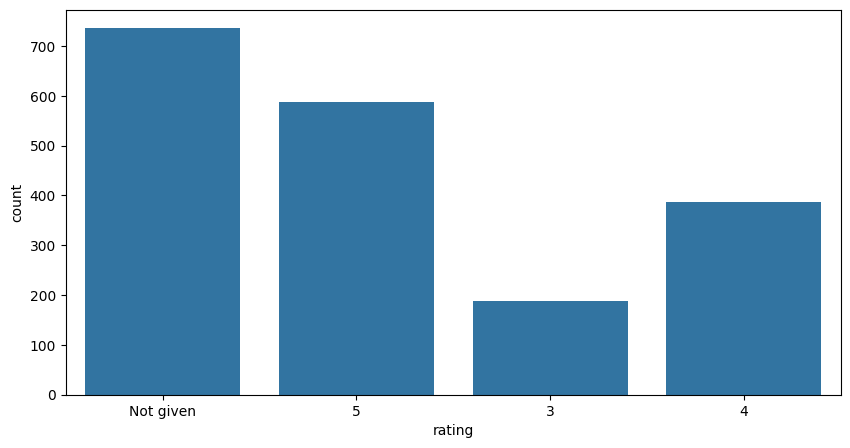

In [19]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'rating');

#### Observations: The largest category is 'Not given' where customers did not provide a rating. Among those who did rate their orders, 5 is the highest with nearly 600 customers, and 3 is the lowest with almost 200 customers.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [41]:
# Write the code here
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations: The top five restaurants are Shake Shack (219 orders), The Meatball Shop (132 orders), Blue Ribbon Sushi (119 orders), Blue Ribbon Fried Chicke (96 orders) and Parm (68 orders).


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [42]:
# Write the code here
df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head(1)

,count
cuisine_type,
American,415


#### Observations: On the weekends the most popular cuisine is American, with 415 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [43]:
# Write the code here
len(df[df['cost_of_the_order'] > 20]) / len(df)

0.2924130663856691

#### Observations: 29.24% of the orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [44]:
# Write the code here
df['delivery_time'].mean()

np.float64(24.161749209694417)

#### Observations: The mean order delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [45]:
# Write the code here
df['customer_id'].value_counts().head(5)

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7


#### Observations: Customer 52832 placed 13 orders. Customer 47440 placed 10 orders. Customer 83287 placed 9 orders. Customer 250494 placed 8 orders. Customer 259341 placed 7 orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<Axes: >

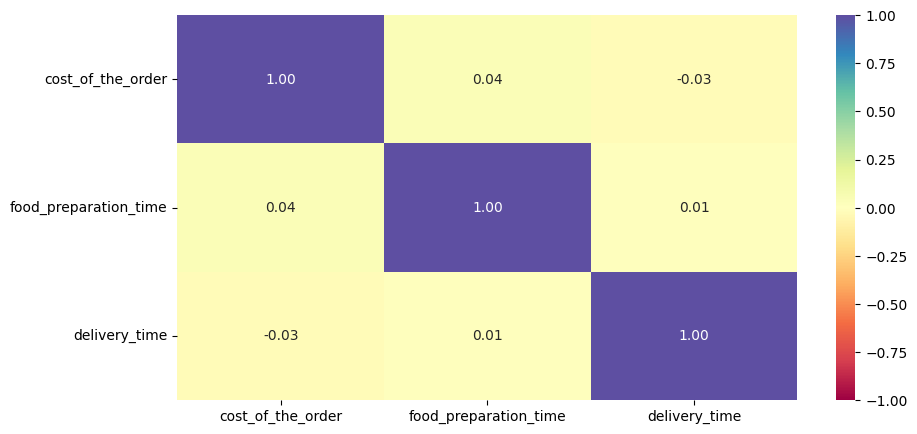

In [6]:
# Write the code here
plt.figure(figsize = (10,5))
sns.heatmap(data = df[['cost_of_the_order','food_preparation_time','delivery_time']].corr(), vmin = -1, vmax = 1, fmt = '.2f', cmap = "Spectral" , annot = True)

#### Observations: There is next to no correlation between the cost, food preparation time and delivery time, meaning that they are largely independent factors.

<Figure size 1000x200 with 0 Axes>

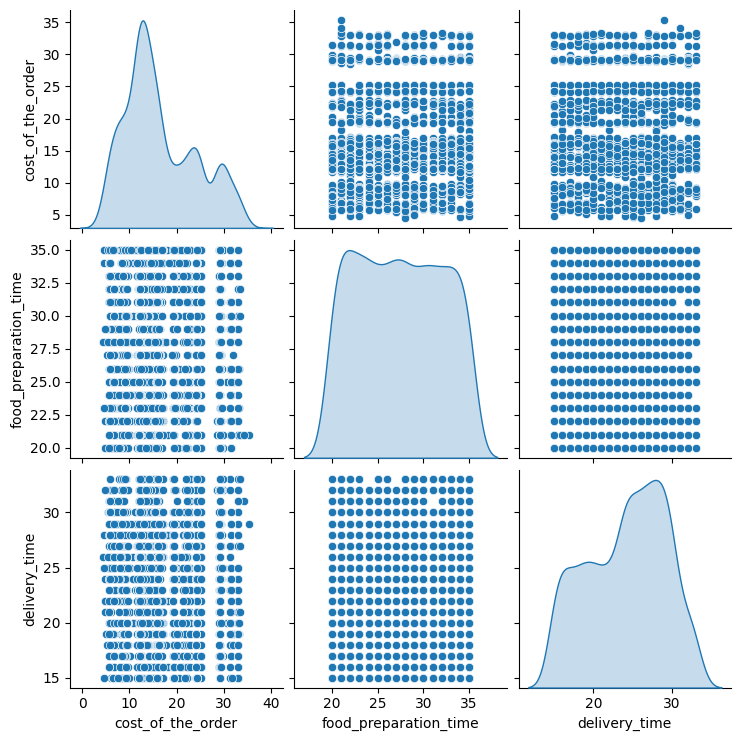

In [7]:
plt.figure(figsize = (10,2))
sns.pairplot(data = df[['cost_of_the_order','food_preparation_time','delivery_time']], diag_kind = 'kde')

#### Observations: Order cost is not related to how long it takes to prepare or deliver. A longer preparation time does not necessarily mean longer delivery time. The delivery time scatterplots don’t show any pattern either, which confirms independence from both cost and preparation time.

<Figure size 1000x200 with 0 Axes>

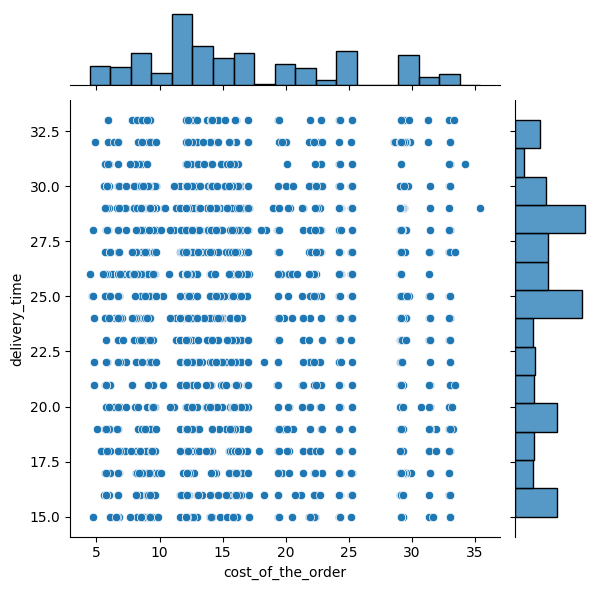

In [10]:
plt.figure(figsize = (10,2))
sns.jointplot(data = df, x = 'cost_of_the_order', y = 'delivery_time', kind = 'scatter')

#### Observations: This shows us no significant relationship between when the food is delievered and how much it cost. Meaning orders of a higher cost does not get delivered faster or slower than cheaper orders.

<Axes: xlabel='rating', ylabel='cost_of_the_order'>

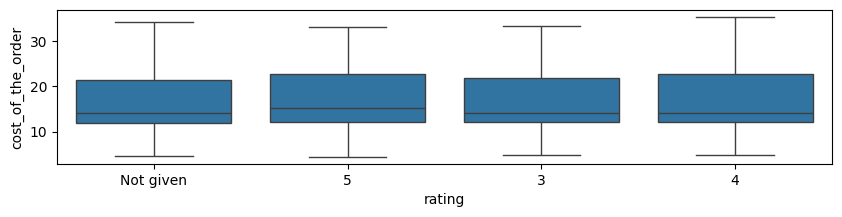

In [11]:
plt.figure(figsize = (10,2))
sns.boxplot(data = df, x = 'rating', y = 'cost_of_the_order')

#### Observations: Order cost remains relatively stable regardless of customer ratings. Median and interquartile ranges are similar across all ratings, suggesting that higher or lower ratings are not influenced by order price.

<Figure size 1000x200 with 0 Axes>

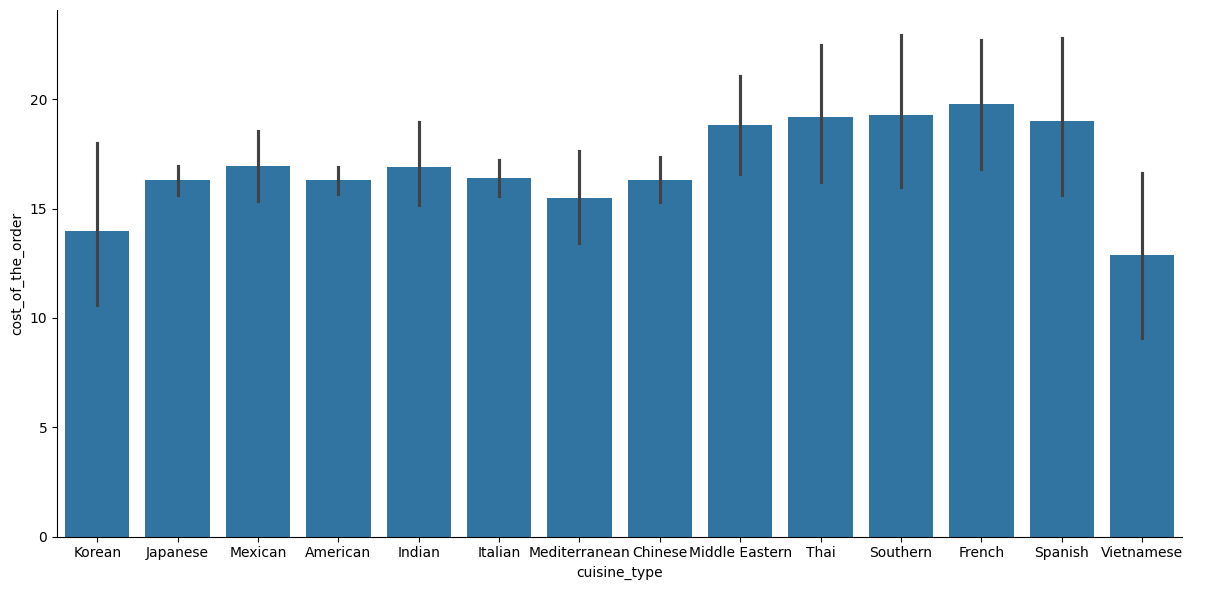

In [14]:
plt.figure(figsize = (10,2))
sns.catplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order', kind = 'bar', height = 6, aspect = 2)

#### Observations: French, Spanish, Southern, Thai and Middle Eastern cuisines have the highest average costs (around $18–$20). Korean and Vietnamese cuisines are among the least expensive, averaging around $14 per order.

<Figure size 1500x700 with 0 Axes>

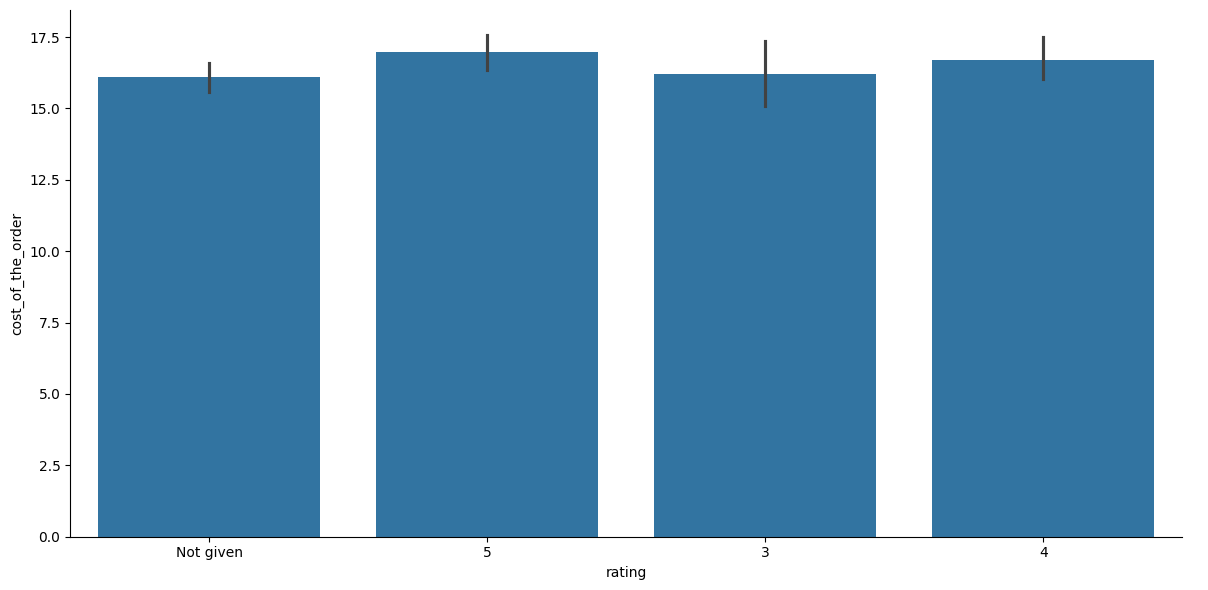

In [15]:
plt.figure(figsize = (15,7))
sns.catplot(data = df, x = 'rating', y = 'cost_of_the_order', kind = 'bar', height = 6, aspect = 2)

#### Observations: Cost remains constant across the different rating categories, meaning that customers satisfaction is not influenced by the price

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [46]:
# Write the code here
df['rating'] = df['rating'].replace(['Not given'],np.nan)
df['rating'] = df['rating'].astype('float')
df['rating'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1898 entries, 0 to 1897
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
1162 non-null   float64
dtypes: float64(1)
memory usage: 15.0 KB


In [50]:
df2 = df.groupby(['restaurant_name'])['rating'].agg(average_rating = 'mean', rating_count = 'count').reset_index()
df2.head()

,restaurant_name,average_rating,rating_count
0,'wichcraft,5.0,1
1,12 Chairs,4.5,2
2,5 Napkin Burger,4.0,2
3,67 Burger,5.0,1
4,Alidoro,NaN,0


In [52]:
df2[(df2['average_rating'] > 4) & (df2['rating_count'] > 50)].sort_values(by = 'average_rating', ascending = False)

,restaurant_name,average_rating,rating_count
153,The Meatball Shop,4.511905,84
20,Blue Ribbon Fried Chicken,4.328125,64
136,Shake Shack,4.278195,133
21,Blue Ribbon Sushi,4.219178,73


#### Observations: The restaurants that have a rating count of more than 50 and average rating greater than 4 are The Meatball Shop, with an average rating of 4.5 from 84 reviews, Blue Ribbon Fried Chicken with an average rating of 4.3 from 64 reviews, Shake Shack with an average rating of 4.3 from 133 reviews and lastly, Blue Ribbon with an average rating of 4.2 from 73 reviews. And therefore, these four restaurants will be receiving the promotional offer.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [53]:
# Write the code here
revenue = 0

for cost in df['cost_of_the_order']:
    if cost > 20:
        revenue += cost * 0.25
    elif cost > 5:
        revenue += cost * 0.15

print("Revenue in $ is", round(revenue, 2))

Revenue in $ is 6166.3


#### Observations: The company's net revenue across all orders is $6166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [57]:
# Write the code here
df['total_time'] = df['delivery_time'] + df['food_preparation_time']
100 * len(df[df['total_time'] > 60]) / len(df)

10.53740779768177

#### Observations: 10.5% of orders takes more than 60 minutes to get delivered from when the order was originally placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [14]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations: During the weekdays the delivery time is 28.34 minutes and on weekends it is 22.47 minutes. It varies by 5.87 minutes.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Most orders occur during weekends, indicating higher demand when customers have more leisure time.
* American and Japanese cuisines are the most ordered, indicating they are customer favorites. Together, they account for the majority of total orders.
* A large number of customers have not given ratings, limiting visibility into satisfaction levels.
* Among those who rated, the majority gave 4 or 5 stars, suggesting strong customer satisfaction.
* Negative feedback is minimal, indicated strong customer satisfaction.

### Recommendations:

*  Focus on high demand cuisines, like Japanese and American, since they are a customer favorite.
* Promote less popular cuisines, like Middle Eastern and Mediterranean cuisines, with promotions and discounts.
* Gently urge customers to leave more reviews.
* Since most customers order during the weekends, ensure adequate staffing and driver availability to maintain fast delivery times and customer satisfaction.


---